In [1]:
%pylab inline
import numpy as np
import math

Populating the interactive namespace from numpy and matplotlib


In [2]:
q=1.0
v_0=5.0
theta_0=math.pi/6
B=1.0
N=1000
m=1.0
t=np.arange(0,100,0.1)

In [3]:
x=-v_0*np.cos(theta_0-t)+v_0*np.cos(theta_0)
y=-v_0*np.sin(theta_0-t)+v_0*np.sin(theta_0)

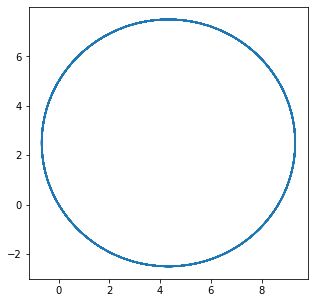

In [4]:
plt.figure(figsize=(5,5))
plt.plot(x,y)

In [5]:
t_max=2*theta_0+math.pi
t=np.arange(0,t_max+0.1,0.1)
t_max,t[-1]

(4.1887902047863905, 4.2)

In [6]:
x=-v_0*np.cos(theta_0-t)+v_0*np.cos(theta_0)
y=-v_0*np.sin(theta_0-t)+v_0*np.sin(theta_0)

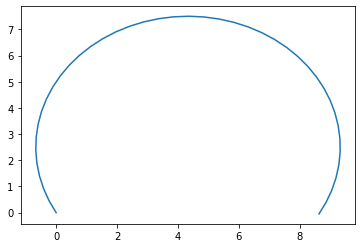

In [7]:
plt.figure()
plt.plot(x,y)

In [8]:
x_max=-v_0*np.cos(theta_0-t_max)+v_0*np.cos(theta_0)
x_max

8.660254037844389

In [9]:
x[-1]

8.631958078762512

In [10]:
y[-1]

-0.04838174781431093

In [11]:
y_max=-v_0*np.sin(theta_0-t_max)+v_0*np.sin(theta_0)
y_max

8.881784197001252e-16

In [23]:
def tiempo(q,B,theta_0, m):
    t_max=(m/(q*B))*(2*theta_0+math.pi)
    dt=t_max/1000
    t=np.arange(0,t_max+dt,dt)
    return t, t_max
def posicion(q,B,v_0,theta_0,m,t):
    omega=q*B/m
    x=-v_0*np.cos(theta_0-omega*t)/omega+v_0*np.cos(theta_0)/omega
    y=-v_0*np.sin(theta_0-omega*t)/omega+v_0*np.sin(theta_0)/omega
    return x,y

2.9769888270061414e-07

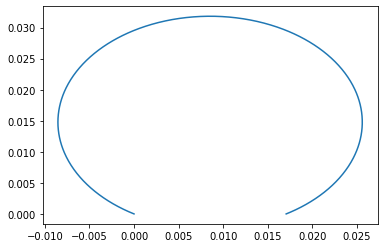

In [30]:
plt.figure()
q=-1.602176565E-19
v_0=3.0E5
theta_0=math.pi/3
B=-10**(-4)
m=9.1093829E-31
time,t_max=tiempo(q,B,theta_0, m)
x_max, y_max=posicion(q,B,v_0,theta_0,m,t_max)
xTeo,yTeo=posicion(q,B,v_0,theta_0,m,time)
plt.plot(xTeo,yTeo)
t_max

In [31]:
def pasoApaso(q,B,v_0,theta_0,m):
    N=10000
    t=0.0
    omega=q*B/m
    dt=1/(omega*N)
    x=[0]
    y=[0]
    v_x=-v_0*np.sin(theta_0)
    v_y=v_0*np.cos(theta_0)
    while y[-1]>=0:
        a_x=omega*v_y
        a_y=-omega*v_x
        x_new=x[-1]+v_x*dt
        y_new=y[-1]+v_y*dt
        x.append(x_new)
        y.append(y_new)
        v_x=v_x+a_x*dt
        v_y=v_y+a_y*dt
        t=t+dt
    x=np.array(x)
    y=np.array(y)
    return x,y,t

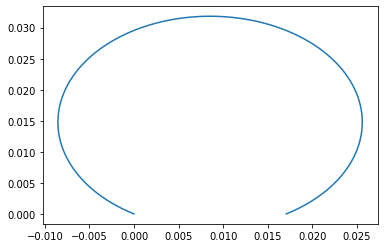

In [32]:
plt.figure()
xF,yF,t_maxF=pasoApaso(q,B,v_0,theta_0,m)
#plt.plot(xTeo,yTeo)
plt.plot(xF,yF)

In [33]:
def delta(omega,v_x,v_y,dt):
    
    delta11=dt*omega*v_y
    delta12=dt*omega*(v_y+delta11/2)
    delta13=dt*omega*(v_y+delta12/2)
    delta14=dt*omega*(v_y+delta13)
    delta1=(delta11+2*delta12+2*delta13+delta14)/6
    delta21=-dt*omega*v_x
    delta22=-dt*omega*(v_x+delta21/2)
    delta23=-dt*omega*(v_x+delta22/2)
    delta24=-dt*omega*(v_x+delta23)
    delta2=(delta21+2*delta22+2*delta23+delta24)/6
    return delta1, delta2

def rungePaso(q,B,v_0,theta_0,m,t_max):
    N=10000
    t=0.0
    omega=q*B/m
    dt=1/(omega*N)
    x=[0]
    y=[0]
    v_x=-v_0*np.sin(theta_0)
    v_y=v_0*np.cos(theta_0)
    while y[-1]>=0:
        x_new=x[-1]+v_x*dt
        y_new=y[-1]+v_y*dt
        x.append(x_new)
        y.append(y_new)
        v_x=v_x+delta(omega,v_x,v_y,dt)[0]
        v_y=v_y+delta(omega,v_x,v_y,dt)[1]
        t=t+dt
    x=np.array(x)
    y=np.array(y)
    return x,y,t

Tiempos máximos  2.9769888270061414e-07 2.976768363307707e-07 2.9770526448001157e-07 .
X máximos  0.01705688954450537 0.01706485134390592 0.017055075356968773 .
Y máximos  1.214306433183765e-17 -5.583607271959988e-07 -6.868718249667334e-07 .


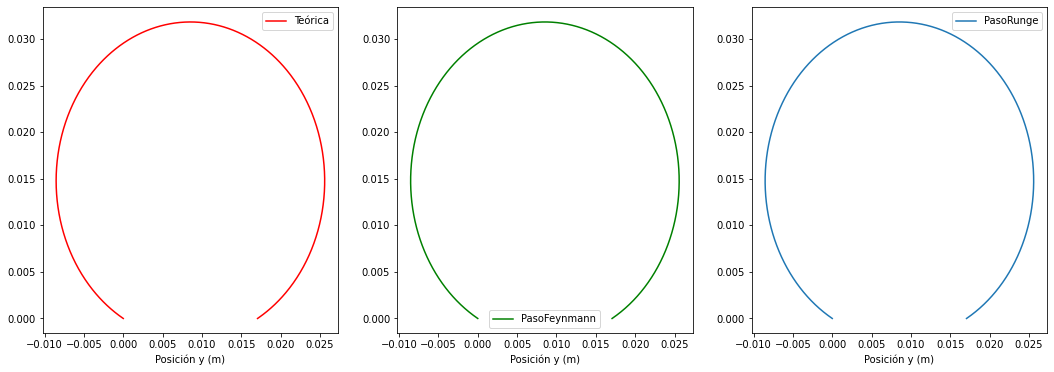

In [46]:
plt.figure(figsize=(18,6))
xR,yR,t_maxR=rungePaso(q,B,v_0,theta_0,m,time[-1])
plt.title("Recorridos de partículas con carga {}C, masa {}kg, velocidad {}m/s, ángulo de entrada {}rad, debidas a un campo perpendicular B={}T.".format(q,m,v_0,theta_0,B))
plt.subplot(1,3,1)
plt.plot(xTeo,yTeo, label="Teórica", c="red")
plt.legend()
plt.xlabel("Posición x (m)")
plt.xlabel("Posición y (m)")
plt.subplot(1,3,2)
plt.plot(xF,yF, label="PasoFeynmann", c="green")
plt.legend()
plt.xlabel("Posición x (m)")
plt.xlabel("Posición y (m)")
plt.subplot(1,3,3)
plt.plot(xR,yR, label="PasoRunge")
plt.legend()
plt.xlabel("Posición x (m)")
plt.xlabel("Posición y (m)")
plt.savefig("recorridos.jpg")
print("Tiempos máximos ",t_max,t_maxF,t_maxR,".")
print("X máximos ",x_max,xF[-1],xR[-1],".")
print("Y máximos ",y_max,yF[-1],yR[-1],".")